# Load Data

In [2]:
char_list= set()
for label in train_labels.values():
    char_list.update(set(label))
char_list=sorted(char_list)
len(char_list)

PosixPath('/kaggle/working/vietnamese_hcr')

In [4]:
TRAIN_JSON = "/kaggle/input/ocr-xla-ptit/vn_handwritten_images/labels.json"
import json 

with open(TRAIN_JSON, 'r', encoding='utf8') as f:
    train_labels = json.load(f)

train_labels

{'1.jpg': 'Số 3 Nguyễn Ngọc Vũ, Hà Nội',
 '2.jpg': 'Số 30 Nguyên Hồng, Láng Hạ, Đống Đa, Hà Nội',
 '3.jpg': '58 Thái Thịnh, Đống Đa, Hà Nội',
 '4.jpeg': 'Số 370/8 khu phố 5B, phường Tân Biên, Biên Hòa, Đồng Nai',
 '5.jpg': 'Vĩnh Trung Plaza, B, 255-257 đường Hùng Vương, phường Vĩnh Trung',
 '6.jpg': 'Tòa nhà 34T, Hoàng Đạo Thúy, Hà Nội',
 '7.jpg': '40 Cát Linh, Đống Đa, Hà Nội',
 '8.jpg': 'phòng 101, tầng 1, lô 04-TT5B, khu đô thị Tây Nam Linh Đàm',
 '9.JPG': 'Nhà 87 ngõ 416 Đê La Thành',
 '10.JPG': 'Up coworking Space, 89 Láng Hạ, Hà Nội',
 '11.jpg': '192 Ngô Đức Kế, quận 1, Hồ Chí Minh',
 '12.jpg': 'số 5 Công Trường Mê Linh, phường Bến Nghé, quận 1',
 '13.jpg': '90A đường Mai Xuân Thưởng, tỉnh Gia Lai',
 '14.jpg': '96/7/12B Phạm Văn Đồng, thành phố Pleiku',
 '15.jpg': '168 Ngô Gia Tự, thành phố Hà Tĩnh',
 '0000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 '0001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 '

In [30]:
dem = []
for _ in train_labels.values():
    dem.append(len(_))

print(max(dem))

69


In [5]:
# Đếm số ký tự khác nhau có trong nội dung

char_list= set()
for label in train_labels.values():
    char_list.update(set(label))
char_list=sorted(char_list)
len(char_list)

140

In [6]:
# Nối 140 ký tự này lại thành một chuỗi. Dùng set và sorted nên các ký tự chỉ xuất hiện 1 lần và đã được sắp xếp

"".join(char_list)

" #'()+,-./0123456789:ABCDEFGHIJKLMNOPQRSTUVWXYabcdeghiklmnopqrstuvwxyzÂÊÔàáâãèéêìíòóôõùúýăĐđĩũƠơưạảấầẩậắằẵặẻẽếềểễệỉịọỏốồổỗộớờởỡợụủỨứừửữựỳỵỷỹ"

In [9]:
# Mã hóa những ký tự này dựa trên index của nó

def encode_to_labels(txt):
    # encoding each output word into digits of indexes
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print("No found in char_list :", char)
        
    return dig_lst

encode_to_labels(" #'()+,-./0123")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [10]:
# Lấy tất cả đường dẫn của ảnh

RAW_FOLDER = "/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data"

train_image_path = []

for item in pathlib.Path(RAW_FOLDER).glob('**/*'):
    if item.is_file() and item.suffix not in [".json"]:
        train_image_path.append(str(item))



# 10 đường dẫn đầu tiên
train_image_path[:10]

['/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/1122_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0667_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/1747_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/1179_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0531_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0171_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0578_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0684_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0753_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0577_samples.png']

Đã tìm được nhãn và đường dẫn của ảnh. Tiến hành tiền xử lý ảnh ở bước dưới

# Tiền xử lý

In [12]:
# Nối đường dẫn và nhãn của ảnh

import os

dict_filepath_label={}
raw_data_path = pathlib.Path(os.path.join(RAW_FOLDER))
for item in raw_data_path.glob('**/*.*'):
    file_name=str(os.path.basename(item))
    if file_name != "labels.json":
      label = train_labels[file_name]
      dict_filepath_label[str(item)]=label

In [15]:
dict_filepath_label

{'/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/1122_samples.png': 'Số 20/50 đường Hàm Nghi, Phường 1, Thành phố Đông Hà, Quảng Trị',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0667_samples.png': '183 Hùng Vương, Phường Cam Lợi, Thành phố Cam Ranh, Khánh Hòa',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/1747_samples.png': 'Số 299 Trần Hưng Đạo, Phường Đại Phúc, Thành phố Bắc Ninh, Bắc Ninh',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/1179_samples.png': '100 Nguyễn Thị Minh Khai, Phường 06, Quận 3, TP Hồ Chí Minh',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0531_samples.png': 'Thôn Tử Dương, Xã Cao Thành, Huyện Ứng Hoà, Hà Nội',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0171_samples.png': '185/50 Ba Tháng Hai, Phường 11, Quận 10, TP Hồ Chí Minh',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0578_samples.png': '66 đường số 33, khu phố 2, Phường Bình An, Quận 2, TP Hồ Chí Minh',
 '/kaggle/input/ocr-xla-pti

In [16]:
# Tìm nhãn có độ dài lớn nhất

label_lens= []
for label in dict_filepath_label.values():
    label_lens.append(len(label))
max_label_len = max(label_lens)

max_label_len

69

In [17]:
all_image_paths = list(dict_filepath_label.keys())

In [18]:
all_image_paths[:10]

['/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/1122_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0667_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/1747_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/1179_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0531_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0171_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0578_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0684_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0753_samples.png',
 '/kaggle/input/ocr-xla-ptit/vn_handwritten_images/data/0577_samples.png']

In [19]:
# Lấy vào độ dài hai cạnh của anh

import cv2
widths = []
heights = []
for image_path in all_image_paths:
    img = cv2.imread(image_path)
    (height, width, _) = img.shape
    heights.append(height)
    widths.append(width)
     

In [20]:
# Tìm min, max độ dài hai cạnh

min_height = min(heights)
max_height = max(heights)
min_width = min(widths)
max_width = max(widths)

In [21]:
(min_height, max_height, min_width, max_width)

(94, 376, 955, 2694)

In [22]:
# Chia tập dữ liệu thành train và valid

from sklearn.model_selection import train_test_split
test_size = 0.2
train_image_paths, val_image_paths = train_test_split(all_image_paths, test_size=test_size, random_state=42)

In [23]:
TIME_STEPS = 240

In [24]:
import numpy as np

training_img = [] # Lưu ảnh đã xử lý
training_txt = [] # Lưu text đã mã hóa
train_input_length = [] # Lưu độ dài input
train_label_length = [] # Lưu độ dài nhãn
orig_txt = [] # Lưu text gốc
resize_max_width=0
i=0
for train_img_path in train_image_paths:
    # chuyển sang ảnh xám
    img = cv2.cvtColor(cv2.imread(train_img_path), cv2.COLOR_BGR2GRAY)
    
    height, width = img.shape

    # Resize ảnh về chiều cao 118 và giữ nguyên tỷ lệ
    img = cv2.resize(img,(int(118/height*width),118))
    
    height, width = img.shape
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]

    # Thêm padding vào bên phải để đạt độ rộng 2167px
    img = np.pad(img, ((0,0),(0, 2167-width)), 'median')
    
    # Làm mờ ảnh bằng Gau
    img = cv2.GaussianBlur(img, (5,5), 0)

    # Ngưỡng hóa ảnh bằng phương pháp thích ứng
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    
    # Thêm 1 kênh màu để phù hợp với đầu vào mạng noron
    img = np.expand_dims(img , axis = 2)
    
    img = img/255.

    label = dict_filepath_label[train_img_path]

    orig_txt.append(label)   
    train_label_length.append(len(label))

    train_input_length.append(TIME_STEPS)
    training_img.append(img)

    training_txt.append(encode_to_labels(label)) 


print(resize_max_width)

2167


190B Trần Quang Khải, Phường Tân Định, Quận 1, TP Hồ Chí Minh


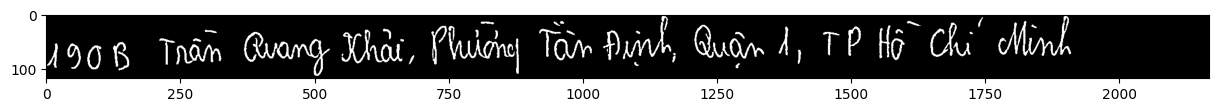

26/24 Nguyễn Bỉnh Khiêm, Phường Đa Kao, Quận 1, TP Hồ Chí Minh


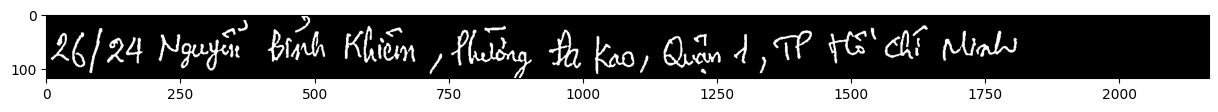

Đường Nguyễn Khuyến, KP1, Thị trấn Võ Xu, Huyện Đức Linh, Bình Thuận


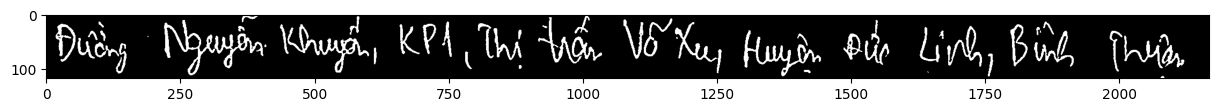

271 đường Đông Bắc, phường Tân Chánh Hiệp, Quận 12, TP Hồ Chí Minh


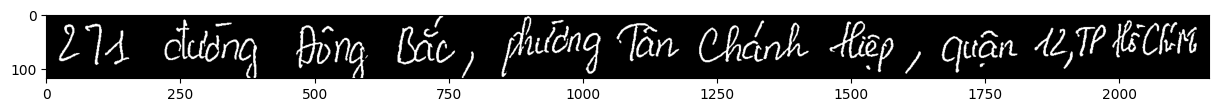

Số 22 Đường Hoàng Đức Tương, Phường 4, Quận 11, TP Hồ Chí Minh


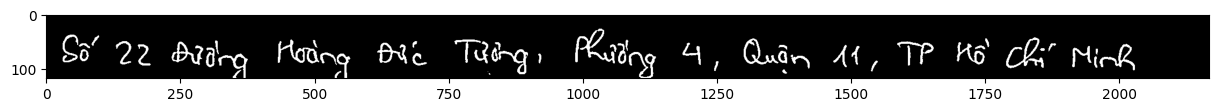

In [26]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(training_img[i][:,:,0], cmap="gray")
    print(orig_txt[i])
    plt.show()

In [27]:
# Với bộ dữ liệu valid thì làm tương tự

valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []

i=0

for val_img_path in val_image_paths:
    img = cv2.cvtColor(cv2.imread(val_img_path), cv2.COLOR_BGR2GRAY)
    
    img = cv2.resize(img,(int(118/height*width),118))
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]
        
    img = np.pad(img, ((0,0),(0, 2167-width)), 'median')
    
    img = cv2.GaussianBlur(img, (5,5), 0)

    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    
    img = np.expand_dims(img , axis = 2)
    
    img = img/255.

    label = dict_filepath_label[val_img_path]

    valid_orig_txt.append(label)   
    valid_label_length.append(len(label))

    valid_input_length.append(TIME_STEPS)
    valid_img.append(img)

    valid_txt.append(encode_to_labels(label))

print(resize_max_width)
     


2167


Số 438, đường Khương Đình, Phường Hạ Đình, Quận Thanh Xuân, Hà Nội


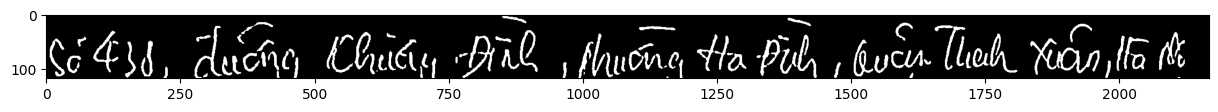

Số 6 ngõ 276, đường Quảng Oai, Thị trấn Tây Đằng, Huyện Ba Vì, Hà Nội


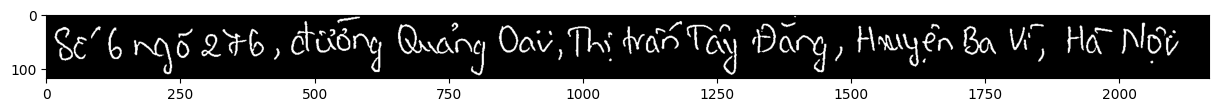

Khu I, thôn Đông Cao, Xã Tráng Việt, Huyện Mê Linh, Hà Nội


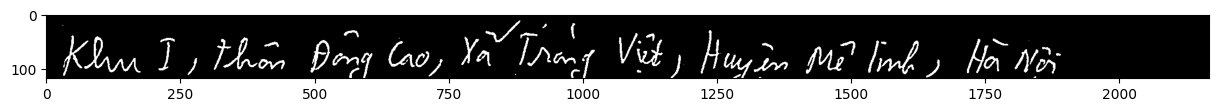

232/17 Võ Thị Sáu, Phường 07, Quận 3, TP Hồ Chí Minh


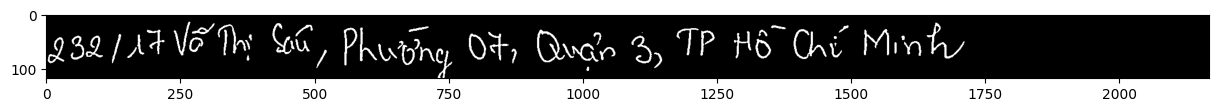

Xóm Đình, thôn 3 Phú ổ, Xã Bình Phú, Huyện Thạch Thất, Hà Nội


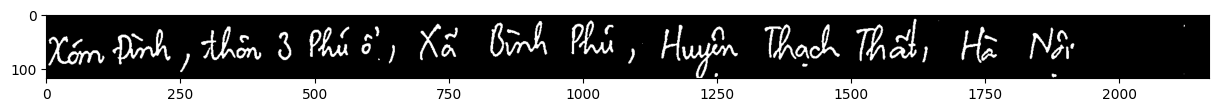

In [28]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    print(valid_orig_txt[i])
    plt.imshow(valid_img[i][:,:,0], cmap="gray")
    plt.show()

In [29]:
max_label_len = TIME_STEPS 

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Thêm giá trị 0 và cuối để đạt đủ độ dài 240 (max_label_len = TIME_STEPS = 240)

train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = 0)
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = 0)

In [32]:
train_padded_txt[0]

array([ 11,  19,  10,  22,   0,  40,  61, 100,  57,   0,  37,  64,  46,
        57,  51,   0,  31,  52,  98,  53,   6,   0,  36,  52,  96, 124,
        57,  51,   0,  40,  75,  57,   0,  90, 115,  57,  52,   6,   0,
        37,  64, 102,  57,   0,  11,   6,   0,  40,  36,   0,  28, 119,
         0,  23,  52,  81,   0,  33,  53,  57,  52,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# Xây dựng Model

In [33]:
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
     

In [46]:
inputs = Input(shape=(118,2167,1))
 
# Khối đầu tiên
x = Conv2D(64, (3,3), padding='same')(inputs)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_1 = x 

# Block 2
x = Conv2D(128, (3,3), padding='same')(x)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_2 = x

# Block 3
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_3 = x

# Block4
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_3])
x = Activation('relu')(x)
x_4 = x

# Block5
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_5 = x

# Block6
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_5])
x = Activation('relu')(x)

# Block7
x = Conv2D(1024, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(3, 1))(x)
x = Activation('relu')(x)

x = MaxPool2D(pool_size=(3, 1))(x)
 
# # to remove the first dimension of one: (1, 31, 512) to (31, 512) 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(x)
 
# Hai lớp LSTM học từ hai chiều từ trái => phải và ngược lại để hiểu ngữ cảnh tốt hơn
blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(blstm_1)

outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

act_model = Model(inputs, outputs)

In [47]:
act_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 118, 2167, │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 118, 2167, │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 39, 722,   │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 39, 722,   │          0 │ max_pooling2d_4[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 39, 722,   │     73,856 │ activation_7[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 13, 240,   │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 13, 240,   │          0 │ max_pooling2d_5[… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 13, 240,   │    295,168 │ activation_8[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      1,024 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 13, 240,   │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 13, 240,   │    590,080 │ activation_9[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      1,024 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 13, 240,   │          0 │ batch_normalizat… │
│                     │ 256)              │            │ activation_9[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 13, 240,   │          0 │ add_2[0][0]       │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 13, 240,   │  1,180,160 │ activation_10[0]… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      2,048 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 13, 240,   │          0 │ batch_normalizat

 Total params: 21,965,197 (83.79 MB)

 Trainable params: 21,960,077 (83.77 MB)

 Non-trainable params: 5,120 (20.00 KB)

In [48]:
labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')

input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)
     

In [38]:
os.makedirs("/kaggle/working/weight.hdf5")

In [ ]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')

# our callbacks hell to optimize our learning
callbacks = [
    TensorBoard(
        log_dir='./logs',
        histogram_freq=10,
        profile_batch=0,
        write_graph=True,
        write_images=False,
        update_freq="epoch"),
    ModelCheckpoint(
        filepath=os.path.join('/kaggle/working/model_weights.hdf5'),
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True,
        verbose=1),
    EarlyStopping(
        monitor='val_loss',
        min_delta=1e-8,
        patience=20,
        restore_best_weights=True,
        verbose=1),
    ReduceLROnPlateau(
        monitor='val_loss',
        min_delta=1e-8,
        factor=0.2,
        patience=10,
        verbose=1)
]
callbacks_list = callbacks

In [50]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 118, 2167, │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 118, 2167, │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 39, 722,   │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 39, 722,   │          0 │ max_pooling2d_4[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 39, 722,   │     73,856 │ activation_7[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 13, 240,   │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 13, 240,   │          0 │ max_pooling2d_5[… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 13, 240,   │    295,168 │ activation_8[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      1,024 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 13, 240,   │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 13, 240,   │    590,080 │ activation_9[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      1,024 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 13, 240,   │          0 │ batch_normalizat… │
│                     │ 256)              │            │ activation_9[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 13, 240,   │          0 │ add_2[0][0]       │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 13, 240,   │  1,180,160 │ activation_10[0]… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 240,   │      2,048 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 13, 240,   │          0 │ batch_normalizat

 Total params: 21,965,197 (83.79 MB)

 Trainable params: 21,960,077 (83.77 MB)

 Non-trainable params: 5,120 (20.00 KB)

In [51]:
# Chuyển bộ dữ liệu huấn luyện và kiểm tra về mảng numpy

training_img = np.array(training_img)
train_input_length = np.array(train_input_length) 
train_label_length = np.array(train_label_length) 

valid_img = np.array(valid_img)
valid_input_length = np.array(valid_input_length) 
valid_label_length = np.array(valid_label_length) 


In [52]:
batch_size = 32
epochs = 100

history = model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], 
          y=np.zeros(len(training_img)),
          batch_size=batch_size, 
          epochs = epochs,
          validation_data = ([valid_img, valid_padded_txt, valid_input_length, valid_label_length], [np.zeros(len(valid_img))]),
          verbose = 1, callbacks = callbacks_list)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/saving/serialization_lib.py:390: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized: model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')

  return {key: serialize_keras_object(value) for key, value in obj.items()}


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 358.6181
Epoch 1: val_loss improved from inf to 243.11226, saving model to /kaggle/working/weight.weights.h5
46/46 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - loss: 356.9196 - val_loss: 243.1123 - learning_rate: 0.0010
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 227.6729
Epoch 2: val_loss improved from 243.11226 to 219.67529, saving model to /kaggle/working/weight.weights.h5
46/46 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - loss: 227.5360 - val_loss: 219.6753 - learning_rate: 0.0010
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 194.5538
Epoch 3: val_loss improved from 219.67529 to 195.94345, saving model to /kaggle/working/weight.weights.h5
46/46 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - loss: 194.3264 - val_loss: 195.9435 - learning_rate: 0.0010
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 159.7192
Epoch 4: val_loss did not improve from 195.94345
46/46 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - loss: 159.6031 - val_loss: 223.0581

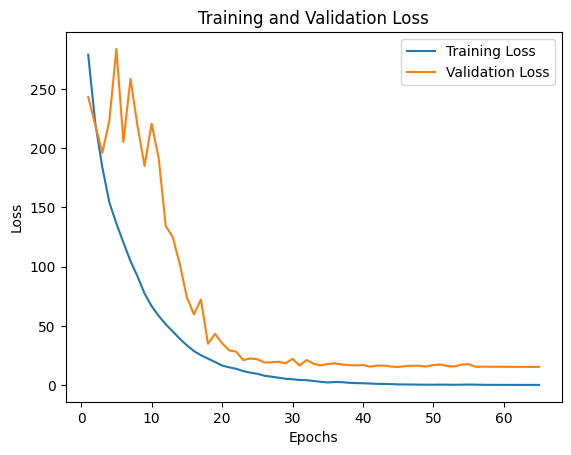

In [53]:
import matplotlib.pyplot as plt

# Extracting the loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss values
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Display the plot
plt.show()


In [55]:
model.load_weights(os.path.join('/kaggle/working/weight.weights.h5'))

In [56]:
prediction = act_model.predict(valid_img)

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 618ms/step


In [57]:
prediction.shape

(368, 240, 141)

In [59]:
NO_PREDICTS = 100
OFFSET=0

out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])

all_predictions =[]
i = 0
for x in out:
    print("original_text  = ", valid_orig_txt[i+OFFSET])
    print("predicted text = ", end = '')
    pred = ""
    for p in x:  
        if int(p) != -1:
            pred += char_list[int(p)]
    print(pred)
    all_predictions.append(pred)
    i+=1
     

original_text  =  Số 438, đường Khương Đình, Phường Hạ Đình, Quận Thanh Xuân, Hà Nội
predicted text = Số 431, đường Khường Đình, Phường Ha Đình, Quận Thanh Xuân, Hà Nội
original_text  =  Số 6 ngõ 276, đường Quảng Oai, Thị trấn Tây Đằng, Huyện Ba Vì, Hà Nội
predicted text = Số 6 ngõ 276, đường Quảng Oai, Thị trấn Tây Đồng, Huyện Ba Vì, Hà Nội
original_text  =  Khu I, thôn Đông Cao, Xã Tráng Việt, Huyện Mê Linh, Hà Nội
predicted text = Khu I, thôn Đông Cao, Xã Tráng Việt, Huyện M inh, Hà Nội
original_text  =  232/17 Võ Thị Sáu, Phường 07, Quận 3, TP Hồ Chí Minh
predicted text = 232/17 Võ Thị Sái, Phường 07, Quận 3, TP Hồ Chí Minh
original_text  =  Xóm Đình, thôn 3 Phú ổ, Xã Bình Phú, Huyện Thạch Thất, Hà Nội
predicted text = Xóm Đình, thôn 3 Phú S, Xã Bình Phú, Huyện Thạch Thất, Hà Nội
original_text  =  509A Hậu Giang, Phường 11, Quận 6, TP Hồ Chí Minh
predicted text = 508A Hnu Giang, Phường 11, Quận 6, TP Hồ Chí Minh
original_text  =  Thôn Phú Thành, Huyện Phú Riềng, Bình Phước
predicte

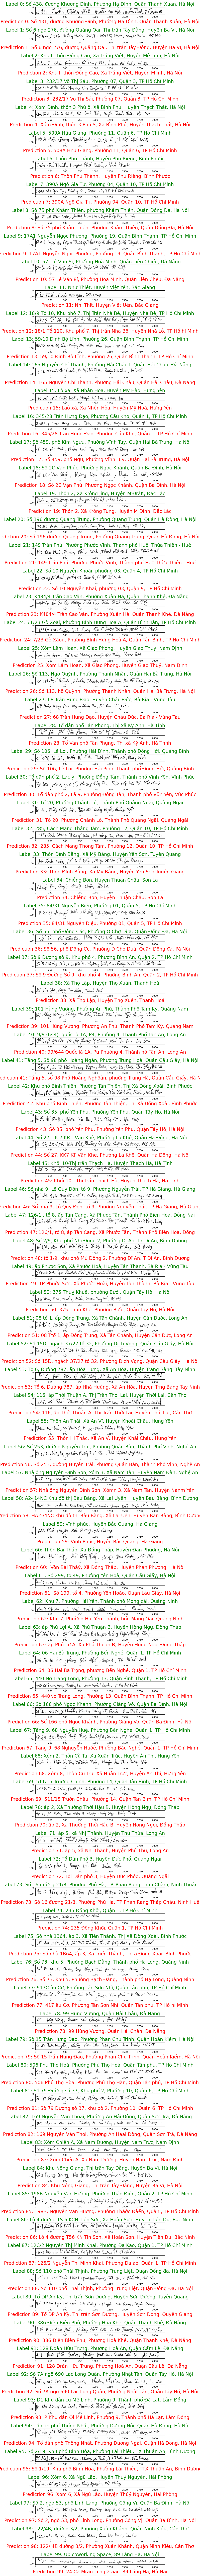

In [60]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,200))
col=0
row=1
gs1 = gridspec.GridSpec(NO_PREDICTS, 1)
# gs1.update(wspace=0.025, hspace=0.025)
for n in range(NO_PREDICTS):
    plt.subplot(gs1[n])
    plt.imshow(valid_img[n][:,:,0], cmap="gray_r")
    plt.title(f"Label {n}: "+valid_orig_txt[n+OFFSET], fontsize=20, color="green")
    plt.xlabel(f"Prediction {n}: "+all_predictions[n+OFFSET], fontsize=20, color="red")

In [ ]:
import string
import unicodedata
import editdistance


def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""

    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))

        pd_cer, gt_cer = list(pd.lower()), list(gt.lower())
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd.lower().split(), gt.lower().split()
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))

        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))

    cer_f = sum(cer) / len(cer)
    wer_f = sum(wer) / len(wer)
    ser_f = sum(ser) / len(ser)

    return (cer_f, wer_f, ser_f)

In [ ]:
evaluate = ocr_metrics(predicts=all_predictions,
                                  ground_truth=valid_orig_txt,
                                  norm_accentuation=False,
                                  norm_punctuation=False)

e_corpus = "\n".join([
    "Metrics:",
    "Character Error Rate: {}".format(evaluate[0]),
    "Word Error Rate:      {}".format(evaluate[1]),
    "Sequence Error Rate:  {}".format(evaluate[2]),
])

In [ ]:
print(e_corpus)
